In [119]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting the data

In [121]:
from sklearn.datasets import load_boston #Inbuilt dataset of scikit learning module

In [122]:
boston = load_boston() #Obtaining the dataset. 

"load_boston" has got pricing details of houses in city of boston with some variables. It is a special kind of dataset developed by scikit learn for praccticing ML. Let us see what information it has.

In [123]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

So our "boston" dataset has got 13 attributes which affect the target (which is 14th attribute) we are looking which is median value of owner-occupied house in thousands of dollar. There are 506 different instances which will help to achieve the target.

## Visualizing data

Let us plot a histogram of mean prices i.e the target. For this particular dataset target can be obtained by simply using <b> boston.target </b>method.

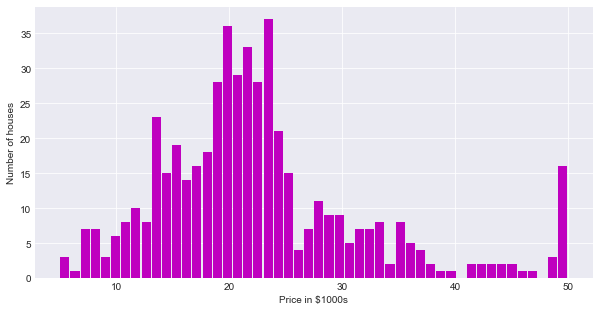

In [124]:
plt.figure(figsize=(10,5))
plt.hist(boston.target,bins = 50,color="m",rwidth=0.9);#adding ; will suppress the array output
plt.xlabel("Price in $1000s")
plt.ylabel("Number of houses")
plt.grid(True)

The median prices lie between 20k to 25k. Let us plot a scatter plot and see how factors like No. of rooms affect price. From dataset description we found that column 5th is No. of rooms so we shall obtain it and plot it against target.<br>
To obtain data we will use <b> boston.data </b> method.

(0, 60)

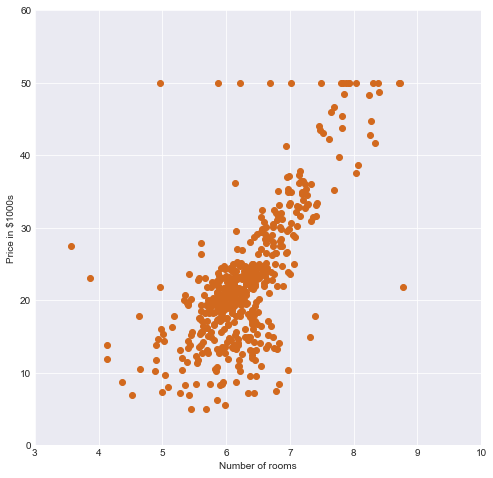

In [125]:
plt.figure(figsize=(8,8))
plt.scatter(boston.data[:,5],boston.target,color="chocolate");#pulled all rows of fifth column on x-axis and target on y-axis
plt.ylabel("Price in $1000s")
plt.xlabel("Number of rooms")
plt.grid(True)
plt.xlim(3,10)
plt.ylim(0,60)

So the graph makes clear that as the number of rooms increases, the price of house also increases, which is as expected.

Now we have seen the general trend, lets do a regression plot using seaborn. To do this we will <br>
1. Convert boston data into a DataFrame.
2. Use seaborn lmplot to develop a scatter plot.

In [127]:
boston_df = DataFrame(boston.data) #Converting all data to dataframe
boston_df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


As the dataframe as no column value so we will import it from boston daataset using <b>boston.feature_name</b><br>
It also dont have Price column so we will also import it using <b>boston.target</b>

In [128]:
boston_df.columns = boston.feature_names
boston_df["Price"] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


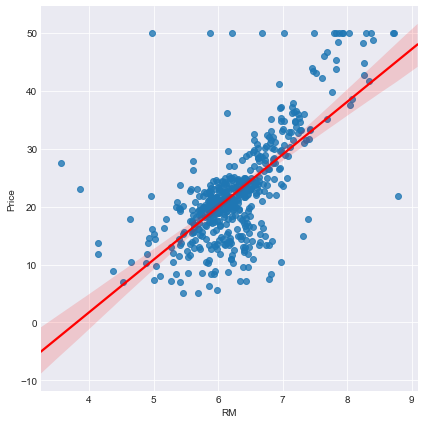

In [129]:
sns.lmplot("RM","Price",data=boston_df,size=6,line_kws={"color":"red"})
sns.set_style("darkgrid")

The regression plot is exactly similar to the scatter plot showing our predicted trend. This was because the dataset is quite unique and this might not be always correct for real-world analysis.

## Using Numpy for a Univariate Linear Regression

Numpy has a built in <b>Least Square Method</b> in its linear algebra library. We'll use this first for our Univariate regression and then move on to scikit learn for out Multi variate regression.<br>
We will start by setting up the X and Y arrays for numpy to take in.<br>
An important note for the X array: Numpy expects a two-dimensional array, the first dimension is the different example values, and the second dimension is the attribute number.<br>
In this case we have our value as the mean number of rooms per house, and this is a single attribute so the second dimension of the array is just 1. So we'll need to create a (506,1) shape array.<br> 
There are a few ways to do this, but an easy way to do this is by using numpy's built-in vertical stack tool, <b>vstack</b>.

In [130]:
X = boston_df.RM #taking values of No of rooms
X.shape

(506,)

X is a series of 506 elements having values of median number of rooms

In [131]:
X = np.vstack(boston_df.RM) #Making series to array

In [132]:
X[0:5]

array([[ 6.575],
       [ 6.421],
       [ 7.185],
       [ 6.998],
       [ 7.147]])

So now we have 506 instances with 1 attribute.

In [133]:
Y = boston_df.Price #Setting matrix for target price
Y[0:5]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

For Least Square Method, we need [x 1] kind of matrix. So we will make it using numpy.

In [134]:
X = np.array([[value,1] for value in X ])

In [135]:
X[0:5]

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       [array([ 6.998]), 1],
       [array([ 7.147]), 1]], dtype=object)

Now we have matrix X, A, Y and with linear algebra module of numpy we can find value of m and c for finding equation of best fir line.

In [136]:
m,c = np.linalg.lstsq(X,Y)[0] #This will give multiple values but we take only the first one.

In [137]:
m

9.1021089811803115

In [138]:
c

-34.670620776438561

Using LSM we found value of m and c, now we can use them to find equation of best fit line using <b>y = mx+c</b>.<br>
x = number of rooms
y = price of house

Text(0.5,0,'Number of rooms')

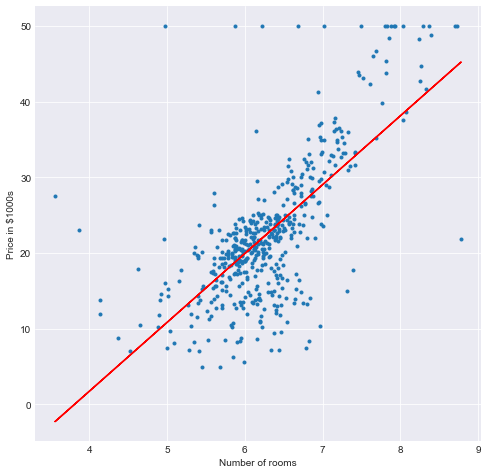

In [139]:
plt.figure(figsize=(8,8))
plt.plot(boston_df.RM,boston_df.Price,".")#Scatter plot of Price vs No. of Rooms

#Plotting best fit line
x = boston_df.RM
plt.plot(x,(m*x+c),"r")
plt.ylabel("Price in $1000s")
plt.xlabel("Number of rooms")

So we used numpy for finding best fit line for our boston housing data.

# Getting Error

We've just completed a single variable regression using the least squares method with Python! Let's see if we can find the error in our fitted line. We found fit line by least square method.
Let us find the root mean square (rms) error.

In [140]:
result = np.linalg.lstsq(X,Y)

In [141]:
error_total = result[1] #Error is stored at index 1

In [144]:
rmse = np.sqrt(error_total/len(X))
print("The root mean square error is:%0.2f" %rmse)

The root mean square error is:6.60


Since the root mean square error (RMSE) corresponds approximately to the standard deviation we can now say that the price of a house won't vary more than 2 times the RMSE 95% of the time.<br>
Thus we can reasonably expect a house price to be within $13,200 of our line fit.

# Multivariate regression

We performed univariate regression using numpy and found equation of best fit line.
<center>eq => y = mx+c</center> 
For univariate data we will multiple coefficients for variable x and a intercept. All this can now be done simpply by SciKit Learn module 

In [157]:
import sklearn
from sklearn.linear_model import LinearRegression

In [146]:
#Create a LinearRegression Object
lreg = LinearRegression()

Seprating our dataframe coulmns

In [149]:
X_multi = boston_df.drop("Price",axis=1) #Data Columns
Y_multi = boston_df.Price #Target

In [150]:
lreg.fit(X_multi,Y_multi)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [151]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_) #The value of intercept co-efficient "c"

 The estimated intercept coefficient is 36.49 


In [152]:
print(' The number of coefficients used was %d ' % len(lreg.coef_)) #The number of coefficients for x

 The number of coefficients used was 13 


y(m,x) = c + m1x1 + m2x2 + m3x3 +....+m13x13

Lets find co-efficient for each feature

In [153]:
coeff_df = DataFrame(boston_df.columns)#Making features dataframe
coeff_df.columns = ["Faetures"]

In [154]:
coeff_df

,Faetures
0,CRIM
1,ZN
2,INDUS
3,CHAS
4,NOX
5,RM
6,AGE
7,DIS
8,RAD
9,TAX


In [155]:
coeff_df["Coefficient Estimate"] = Series(lreg.coef_)
coeff_df

,Faetures,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


The coefficient of RM (No of rooms) is higher compared to others. It indicates that this factor is the one which affects the price of the house by highest degree

# Training and Validation

In a dataset a training set is implemented to build up a model, while a validation set is used to validate the model built. Data points in the training set are excluded from the validation set. 

In [159]:
from sklearn.cross_validation import train_test_split

In [160]:
X_train,X_test,Y_train,Y_test = train_test_split(X,boston_df.Price)

In [161]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


# Predicting Price

In [162]:
lin_reg = LinearRegression()

In [163]:
lin_reg.fit(X_train,Y_train) #Linear regression on training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now that on our training data, linear regression has been done, let us perform prediction of both training data and testing data.

In [165]:
predict_train = lin_reg.predict(X_train)
predict_test = lin_reg.predict(X_test)

In [168]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - predict_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - predict_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 44.49
Fit a model X_train, and calculate MSE with X_test and Y_test: 41.19


t looks like our mean square error between our training and testing was pretty close. But how do we actually visualize this?

# Residual Plot

<b><center>Residual=Observedvalue−Predictedvalue</center></b>
A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

Text(0.5,1,'Residual Plots')

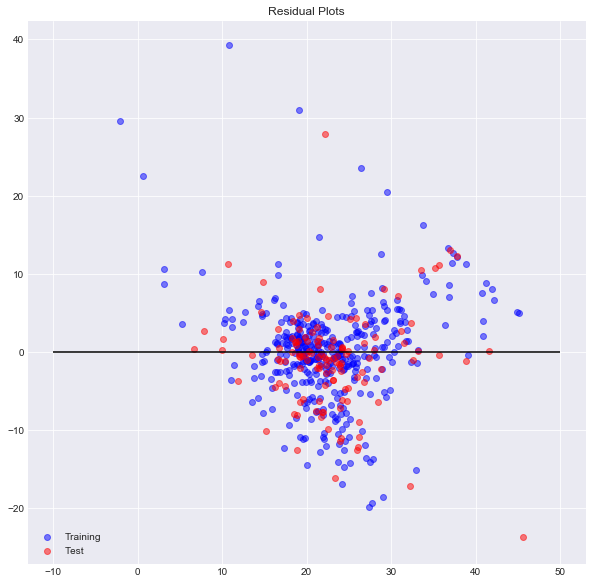

In [177]:
plt.figure(figsize=(10,10))
#Scatter plot for training data
train = plt.scatter(predict_train,(Y_train-predict_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(predict_test,(Y_test-predict_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')